(58,)
(58,)


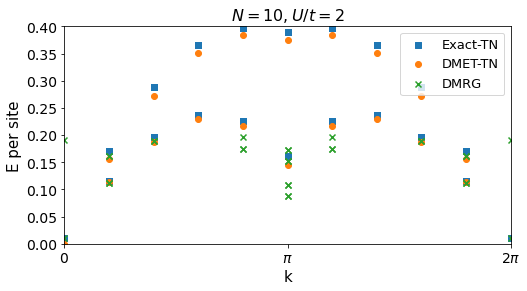

(58,)
(58,)


(58,)
(58,)


(58,)
(58,)


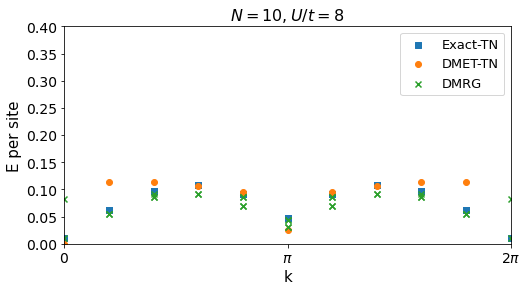

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def draw_plot(N=10, U=4):
    plt.figure(figsize=(8,4))
    dmet_data = np.loadtxt("./results/{}-dmet-tn.dat".format(U))

    klst = []
    elst = []
    for dat in dmet_data:
        klst.append(dat[0])
        elst.append(dat[1])
        klst.append(dat[0])
        elst.append(dat[2])

    klst = np.array(klst)
    elst = np.array(elst)

    plt.xlim(0, np.pi*2)

    elst_exact = np.loadtxt("./results/energies-{}-{}-15.txt".format(N, U))
    elst_exact = np.hstack((elst_exact, elst_exact))

    klst_exact = np.arccos(np.loadtxt("./results/chars-{}-{}-15.txt".format(N,U)))
    klst_exact = np.array([round(x) for x in list(np.hstack((klst_exact, np.pi*2-klst_exact)) / (1/(N/2) * np.pi))]) * (1/(N/2) * np.pi)

    elst_TN = np.loadtxt("./results/energy-exactTN-{}-{}.txt".format(N, U))
    elst_TN = np.hstack((elst_TN, elst_TN))

    klst_TN = np.arccos(np.loadtxt("./results/char-exactTN-{}-{}.txt".format(N,U)))
    klst_TN = np.array([round(x) for x in list(np.hstack((klst_TN, np.pi*2-klst_TN)) / (1/(N/2) * np.pi))]) * (1/(N/2) * np.pi)
    print(elst_TN.shape)
    print(klst_TN.shape)

    plt.xticks([0, np.pi, 2*np.pi], [r"$0$", r"$\pi$", r"$2\pi$"], fontsize=14)
    plt.xlabel(r"k", fontsize=15)
    plt.ylabel("E per site", fontsize=15)
    plt.yticks(fontsize=14)
     
    plt.scatter(klst_TN, (elst_TN - min(elst)) / N, marker='s', label='Exact-TN')
    plt.scatter(klst, (elst - min(elst)) / N, marker='o', label='DMET-TN')
    plt.scatter(klst_exact, (elst_exact - min(elst)) / N, marker='x', label='DMRG', )

    plt.ylim(0, 0.4)
    plt.title(r"$N = {}, U/t = {}$".format(N, U), fontsize=16)
    plt.legend(fontsize=13)
    plt.show()

for U in [2,4,6,8]:
    draw_plot(U=U)

30


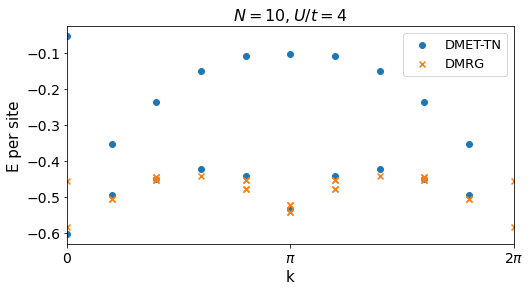

In [39]:
import numpy as np
import matplotlib.pyplot as plt

N = 10
U = 4

plt.figure(figsize=(8,4))
dmet_data = np.loadtxt("{}-dmet-tn.dat".format(U))

klst = []
elst = []
for dat in dmet_data:
    klst.append(dat[0])
    elst.append(dat[1])
    klst.append(dat[0])
    elst.append(dat[2])

klst = np.array(klst)
elst = np.array(elst)

plt.xlim(0, np.pi*2)

elst_exact = np.loadtxt("energies-{}-{}-15.txt".format(N, U))
elst_exact = np.hstack((elst_exact, elst_exact))

klst_exact = np.arccos(np.loadtxt("chars-{}-{}-15.txt".format(N,U)))

klst_exact = np.array([round(x) for x in list(np.hstack((klst_exact, np.pi*2-klst_exact)) / (1/(N/2) * np.pi))]) * (1/(N/2) * np.pi)
print(len(klst_exact))

plt.xticks([0, np.pi, 2*np.pi], [r"$0$", r"$\pi$", r"$2\pi$"], fontsize=14)
plt.xlabel(r"k", fontsize=15)
plt.ylabel("E per site", fontsize=15)
plt.yticks(fontsize=14)
plt.scatter(klst, elst / N, marker='o', label='DMET-TN')
plt.scatter(klst_exact, elst_exact / N, marker='x', label='DMRG')
plt.title(r"$N = {}, U/t = {}$".format(N, U), fontsize=16)
plt.legend(fontsize=13)


[-2.64851756 -2.00357947 -1.61373898 -1.61373856 -1.33850416 -1.33850367
  2.68948763  2.6894879   3.96915831  3.96915881  4.31183693  4.35268045
  4.75735949  4.93631277  4.9363129   5.01579369  5.0157942 ]
[ 1.  -1.   0.5  0.5 -0.5 -0.5  0.5  0.5 -0.5 -0.5 -1.   1.  -1.   0.5
  0.5 -0.5 -0.5]

In [38]:
import numpy as np
import matplotlib.pyplot as plt

N = 18

ylm = np.array([.33, .24, .18, .15]) * 18

for idx, U in enumerate([2, 4, 6, 8]):

    plt.figure(figsize=(8,4))
    exact_ext_energy = np.loadtxt("./exact-ext/energies-18-{}-36.txt".format(U))
    exact_ext_char = np.loadtxt("./exact-ext/chars-18-{}-36.txt".format(U))
    dmet_array = np.loadtxt("./dmet-tn-18/data-{}.txt".format(U))
    exact_tn_energy = np.loadtxt("./results/energy-exactTN-18-{}.txt".format(U))
    exact_tn_char = np.loadtxt("./results/char-exactTN-18-{}.txt".format(U), dtype=np.complex128).real

    klst_dmet = []
    elst_dmet = []
    for dat in dmet_array:
        klst_dmet.append(dat[0])
        elst_dmet.append(dat[1])
        klst_dmet.append(dat[0])
        elst_dmet.append(dat[2])

    exact_tn_energy = np.hstack((exact_tn_energy, exact_tn_energy))
    exact_ext_energy = np.hstack((exact_ext_energy, exact_ext_energy))

    def modified_arccos(array):
        arr = []
        for x in array:
            if x <= -1.00: arr.append(np.pi)
            elif x >= 1.00: arr.append(0)
            else: 
                arr.append(np.arccos(x))

        return np.array(arr)

    klst_exact = modified_arccos(exact_ext_char)
    klst_exact = np.array([round(x) for x in list(np.hstack((klst_exact, np.pi*2-klst_exact)) / (1/(N/2) * np.pi))]) * (1/(N/2) * np.pi)
    klst_tn = modified_arccos(exact_tn_char)
    klst_tn = np.array([round(x) for x in list(np.hstack((klst_tn, np.pi*2-klst_tn)) / (1/(N/2) * np.pi))]) * (1/(N/2) * np.pi)

    klst_dmet2 = []
    elst_dmet2 = []

    fo = open("./dmet-tn-18-2sites/data-{}.txt".format(U), 'r')
    for line in fo.readlines():
        dat = [eval(x) for x in line.split()]
        for i, e in enumerate(dat[1:]):
            if i <= 2:
                klst_dmet2.append(dat[0])
                elst_dmet2.append(e)
    fo.close()

    klst_dmet2 = np.array(klst_dmet2)
    elst_dmet2 = np.array(elst_dmet2)
    

    plt.xticks([0, np.pi, 2*np.pi], [r"$0$", r"$\pi$", r"$2\pi$"], fontsize=14)
    plt.xlabel(r"k", fontsize=15)
    plt.ylabel(r"Excitation Energy / $t$", fontsize=15)
    plt.yticks(fontsize=14)
    plt.xlim(0, 2*np.pi)

    ylim = ylm[idx]

    plt.ylim(0, ylim)
    plt.yticks(np.linspace(0, ylim, 4))

    for i in np.linspace(0, ylim, 4):
        plt.hlines(i, 0, np.pi*2, colors='#88888888', linestyles='--')
    for i in np.linspace(0, 2*np.pi, N+1):
        plt.vlines(i, 0, ylim, colors='#88888888', linestyles='--')
    
    plt.scatter(klst_exact, (exact_ext_energy - min(exact_ext_energy)), marker='x', label='DMRG', s=60, color='red')
    plt.scatter(klst_tn, (exact_tn_energy - min(exact_tn_energy)), marker='o', label='Exact-TN-1Site', color='green')
    plt.scatter(klst_dmet, (elst_dmet - min(elst_dmet)), marker='+', label='DMET-1site', color='blue', s=160)
    #plt.scatter(klst_dmet2, (elst_dmet2 - min(elst_dmet2)), marker='x', label='DMET-2Site', #color='red', s=100)

    plt.legend(fontsize=13, loc='upper right')
    plt.title("U = {}".format(U), fontsize=17)
    plt.show()

In [42]:
with open("conv_summary.txt", "r") as f:
    lines = f.readlines()
    newlines = []
    for line in lines:
        newline = ",".join(line.split())
        newlines.append(newline)
    with open("conv_summary.csv", "w") as nf:
        for line in newlines:
            nf.write(line+"\n")
    nf.close()